# CrossEntropyLoss 用于多分类任务

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

$$
\operatorname{softmax}\left(x_i\right)=\frac{e^{x_i}}{\sum_j e^{x_j}}
$$

In [2]:
logits = torch.tensor([1.0, 2.0, 3.0])
probs = F.softmax(logits, dim=0)
print("Softmax output:", probs)
print("Sum of probabilities:", probs.sum())  # 应该等于 1

Softmax output: tensor([0.0900, 0.2447, 0.6652])
Sum of probabilities: tensor(1.)


In [3]:
# 模拟 4 个样本，每个有 3 个类别
logits = torch.tensor([
    [1.5, 0.3, 2.1],
    [0.1, 1.2, -0.5],
    [-1.0, 2.0, 0.0],
    [1.0, 1.0, 1.0]
])  # shape: [4, 3]

# 正确标签（每个样本属于哪个类，index 从 0 开始）这里只能是index!!!
labels = torch.tensor([2, 1, 1, 0])  # shape: [4]

loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(logits, labels)

print("CrossEntropyLoss:", loss.item())


CrossEntropyLoss: 0.5557835102081299


In [4]:
probs = F.softmax(logits, dim=1)
print("Softmax probabilities:\n", probs)

# 查看每个样本在正确类别上的预测概率：
correct_probs = probs[range(len(labels)), labels]
print("Correct class probabilities:", correct_probs)

# 交叉熵 = -log(correct prob)
manual_loss = -torch.log(correct_probs).mean()
print("Manual CrossEntropyLoss:", manual_loss.item())


Softmax probabilities:
 tensor([[0.3202, 0.0964, 0.5834],
        [0.2196, 0.6598, 0.1205],
        [0.0420, 0.8438, 0.1142],
        [0.3333, 0.3333, 0.3333]])
Correct class probabilities: tensor([0.5834, 0.6598, 0.8438, 0.3333])
Manual CrossEntropyLoss: 0.5557835102081299


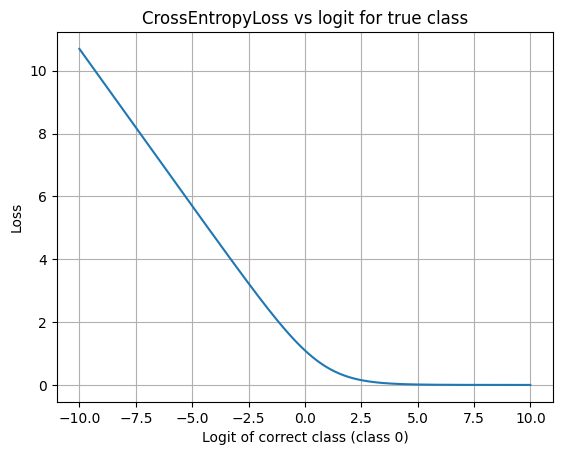

In [5]:
logits = torch.zeros(200, 3)  # 每组 3 个类，先全为0
logits[:, 0] = torch.linspace(-10, 10, 200)  # 改变第一个类的 logit

labels = torch.zeros(200, dtype=torch.long)  # 每个样本真实类别是 0
loss_vals = F.cross_entropy(logits, labels, reduction='none')

plt.plot(logits[:, 0].numpy(), loss_vals.numpy())
plt.title("CrossEntropyLoss vs logit for true class")
plt.xlabel("Logit of correct class (class 0)")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
